In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def randomized_svd_flops(m, n, r, power_iters):
    r2 = np.power(r, 2)
    r3 = np.power(r, 3)
    list_of_terms = [2 * m * n*r, 
                     2 * m * r2 - ((2.0/3.0) * r3),
                    4*r2*m + 2*r3 - 2*r2,
                    14*n*r2 + 8*r3,
                    2*m*r2]
    cost_power_iters = 4 * m * n * r * power_iters
    return sum(list_of_terms) + cost_power_iters

def svd_flops(m, n, r):
    n2 = n**2
    n3 = n**3
    k = 5
    list_of_terms = [4*m*n2 - ((4.0/3.0) * n3),
                     k*r*n,
                     4*r*m*n - 2*r*n2 + 2*r*n,
                     2*r*n*(n+1)
                    ]
    return sum(list_of_terms)
print(np.format_float_scientific(randomized_svd_flops(3136, 2048, 61)))
print(np.format_float_scientific(svd_flops(3136, 2048, 61)))

print(np.format_float_scientific(329280826024))

m=3136
n=2048
ranks = np.arange(1,2048)
randomized = [randomized_svd_flops(m, n, r) for r in ranks]
original = [svd_flops(m, n, r) for r in ranks]
ranks = [0] + list(ranks)
randomized = [0] + randomized
original = [0] + original
plt.figure(figsize=(12, 8))
ranks = np.log10(ranks)
randomized = np.log10(randomized)
original = np.log10(original)
plt.plot(ranks, randomized, label='randomized SVD')
plt.plot(ranks, original, label='original SVD')
plt.legend()
plt.xlabel("SVD Rank (log)")
plt.ylabel("SVD FLOPs (log)")
plt.grid()
plt.title("SVD Rank vs FLOP count\n Compression of Dense Layer (3136x2048)")

plt.savefig('flops.png')


TypeError: randomized_svd_flops() missing 1 required positional argument: 'power_iters'

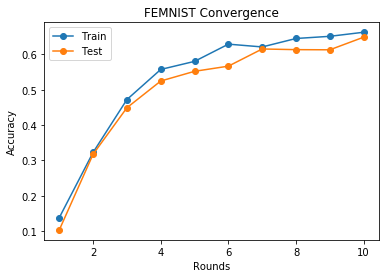

In [3]:
# svd_train_accuracies = [0.0942163, 0.32256, 0.461104, 0.544892, 0.582244]
# svd_test_accuracies = [0.0785127, 0.31313, 0.461178,  0.533197, 0.56859]

# full rank
svd_train_accuracies_full = [0.138588, 0.322955, 0.47214, 0.557138, 0.579983, 0.628616, 0.620728, 0.644605, 0.65075, 0.662249]
svd_test_accuracies = [0.103851, 0.317736, 0.449005, 0.524477, 0.551886, 0.566456, 0.614988, 0.613086,  0.612654, 0.648308]

#100-rank 
svd_train_accuracies_100 = [0.0539205, 0.0747245, 0.207245, 0.349931, 0.409138, 0.470209, 0.499412, 0.528098, 0.54781, 0.577126]
# svd_test_accuracies = [0.0613994, ]


rounds = np.arange(1, 11)
plt.plot(rounds, svd_train_accuracies_full, marker='o', label="Train")
plt.plot(rounds, svd_test_accuracies, marker='o', label="Test")
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("FEMNIST Convergence")
plt.legend()
plt.savefig('svd_full.png')
# plt.grid()


In [4]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# f = open("svd_experiments/400-rank-svd-80rds-eval1.txt", "r")
f = open("svd_experiments/repro-vb.txt", "r")

test_accuracies_10th = []
test_accuracies_mean = []
test_accuracies_90th = []

for x in f:
    if x.startswith("test_accuracy"):
        terms = x.split()
        test_accuracies_10th += [float(terms[4][:-1])]
        test_accuracies_mean += [float(terms[1][:-1])]
        test_accuracies_90th += [float(terms[-1])]
print(test_accuracies_10th)
print(test_accuracies_mean)
print(test_accuracies_90th)


step = 2

rounds = list(np.arange(1, 81, step))
# rounds.remove(20)
print(rounds)
print(len(test_accuracies_10th))
print(len(rounds))
axes = plt.gca()
axes.set_ylim([0,1])

plt.plot(rounds, test_accuracies_10th[::step], label="10th percentile")
plt.plot(rounds, test_accuracies_mean[::step], label="Mean")
plt.plot(rounds, test_accuracies_90th[::step], label="90th percentile")

plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("FEMNIST Accuracy vs. Round Number")
plt.legend()
plt.savefig('400-rank.png')
        

FileNotFoundError: [Errno 2] No such file or directory: 'svd_experiments/repro-vb.txt'

<Figure size 640x480 with 0 Axes>

In [ ]:
rank = [4, 100, 400, 1000, 3136]
mean_accuracy = [0.605006, 0.80664, 0.789192, 0.811059, 0.802238]
plt.plot(rank, mean_accuracy, label="10th percentile")
axes = plt.gca()
axes.set_ylim([0,1])

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
f = open("svd_experiments/femnist_SVD_400rank_80rds_2020-12-07-000944.txt", "r")
mean_test_accuracies_1000 = []

for x in f:
    if x.startswith("test_accuracy"):
        terms = x.split()
        mean_test_accuracies_1000 += [float(terms[1][:-1])]
# mean_test_accuracies_1000 = mean_test_accuracies_1000[1:]
print(len(mean_test_accuracies_1000))
f.close()
f = open("svd_experiments/fixed/nocomp-80rds-2.txt", "r")
mean_test_accuracies_nocomp = []


for x in f:
    if x.startswith("test_accuracy"):
        terms = x.split()
        mean_test_accuracies_nocomp += [float(terms[1][:-1])]
print(len(mean_test_accuracies_nocomp))


step = 1

rounds = list(np.arange(0, 81, step))
# rounds.remove(20)
print(rounds)
print(len(mean_test_accuracies_1000))
print(len(rounds))
axes = plt.gca()
axes.set_ylim([0,1])

plt.plot(rounds, mean_test_accuracies_1000[::step], label="rank = 400")
plt.plot(rounds, mean_test_accuracies_nocomp[::step], label="no compression")
# plt.plot(rounds, test_accuracies_90th[::step], label="90th percentile")

plt.xlabel("Rounds")
plt.ylabel("Mean Accuracy")
plt.title("FEMNIST Accuracy vs. Round Number")
plt.legend()
plt.savefig('compare.png')
        

In [ ]:
parameters = [6422528, 17152, 2074000, 5260, 5185000, 15555, 64226, 642253]
accuracy = [0.806642270941212,0.805087967573766,0.785492,0.78727221145235,0.785534,0.76231,0.78395,0.792212]
plt.figure(figsize=(14,8))
plt.scatter(parameters, accuracy)
plt.grid(True, which="both")
plt.xscale("log")
plt.xlabel("Parameter count of Dense layer")
plt.ylabel("Accuracy after 80 Rounds")
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# font = {'family' : 'normal',
#         'size'   : 12}

# plt.rc('font', **font)
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

labels = ["Full Model", "TT Rank 8", "SVD Rank 400", "Kronecker Factorization", "SVD Rank 1000", "SVD Rank 3", "1% Subsampling", "10% Subsampling"]
for i in range(len(parameters)):
    xytext=(-30,5)
    if i == 2:
        xytext=(-70, 5)
    plt.annotate(labels[i], (parameters[i], accuracy[i]), textcoords="offset points",  xytext=xytext, fontsize=15)
plt.savefig('compare.png')

    

In [ ]:
import glob, os
ranks = [str(i) for i in range(1,400,10)]
folder = "./svd_experiments"
files = []
for file in os.listdir(folder):
    if "rank" in file:
        files += [os.path.join(folder, file)]
filtered = []
for f in files:
    if any(ext+"rank" in f for ext in ranks):
        filtered += [f]
final_accuracies = []
final_ranks = []
for fname in filtered:
    f = open(fname, "r")
    mean_accuracies = []
    for x in f:
        if x.startswith("test_accuracy"):
            terms = x.split()
            mean_accuracies += [float(terms[1][:-1])]
    
    if len(mean_accuracies) == 81:
        final_accuracies += [mean_accuracies[-1]]
        rank = int(fname.split("_")[3][:-4])
        final_ranks += [rank]
    f.close()

plt.figure(figsize=(14,8))

assert(len(final_accuracies) == len(final_ranks))
final_ranks, final_accuracies = zip(*sorted(zip(final_ranks, final_accuracies)))
flops = [randomized_svd_flops(3136, 2048, r) for r in final_ranks]
# final_ranks = [0] + list(final_ranks)

# final_accuracies = [0.761248] + list(final_accuracies)
print(final_accuracies)
print(flops)
total_flops = [750000000 + 12040000000 + 7710000000 + 152300000 + f for f in flops]

logflops = flops#np.log10(flops)

# final_accuracies = final
# plt.plot(logflops[1:], final_accuracies[1:])
plt.plot(total_flops, final_accuracies)
# plt.plot(flops, final_accuracies)
plt.grid(True, which="both")
# plt.xlabel("SVD Rank")
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title("Total FLOP count vs. Accuracy after 80 rounds")
plt.xlabel("Total FLOP count (1e10 FLOPs)")
plt.ylabel("Accuracy after 80 Rounds")
plt.savefig('ranks.png')


In [ ]:
print(final_accuracies)
print(flops)
print(final_ranks)

fig, ax1 = plt.subplots(figsize=(14,8))
plt.grid(True, which="both")

color = 'tab:red'
ax1.set_xlabel('SVD output rank')
ax1.set_ylabel('Test accuracy', color=color)
ax1.plot(final_ranks, final_accuracies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SVD flops', color=color)  # we already handled the x-label with ax1
ax2.plot(final_ranks, flops, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("test.png")



In [ ]:
print(filtered)
rank_61="./svd_experiments/femnist_SVD_61rank_80rds_945seed_2020-12-07-015851.txt"
f = open(rank_61, "r")
mean_accuracies_61 = []
for x in f:
    if x.startswith("test_accuracy"):
        terms = x.split()
        mean_accuracies_61 += [float(terms[1][:-1])]
f.close()
rank_391="../models/femnist_SVD_400rank_80rds_0seed_2021-02-21-175628test.txt"
#'./svd_experiments/femnist_SVD_391rank_80rds_29seed_2020-12-07-040416.txt'
f = open(rank_391, "r")
mean_accuracies_391 = []
for x in f:
    if x.startswith("test_accuracy"):
        terms = x.split()
        mean_accuracies_391 += [float(terms[1][:-1])]
f.close()
rank_1="../models/femnist_SVD_0rank_80rds_0seed_2021-02-21-192822test.txt"
#'./svd_experiments/femnist_SVD_1rank_80rds_886seed_2020-12-07-013901.txt'
f = open(rank_1, "r")
mean_accuracies_1 = []
for x in f:
    if x.startswith("test_accuracy"):
        terms = x.split()
        mean_accuracies_1 += [float(terms[1][:-1])]
f.close()

full_rank="../models/femnist_SVD_2048rank_80rds_0seed_2021-02-21-213017test.txt"
f = open(full_rank, "r")
mean_accuracies_full = []
for x in f:
    if x.startswith("test_accuracy"):
        terms = x.split()
        mean_accuracies_full += [float(terms[1][:-1])]
f.close()

rounds = list(np.arange(0, 81, 1))
plt.figure(figsize=(14,8))

plt.grid(True, which="both")
plt.plot(rounds, mean_accuracies_1, label="rank =  0")
plt.plot(rounds, mean_accuracies_61, label="rank = 61")
# plt.plot(rounds, mean_accuracies_391, label="rank = 400")
plt.plot(rounds, mean_accuracies_full, label="full rank")
plt.legend()
plt.xlabel("Rounds")
plt.ylabel("Test accuracy")
# plt.title("Comparing SVD rank performance")
plt.savefig("compare.png")

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,8))
plt.grid(True, which="both")
color = 'tab:red'
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

compression_size = [3136*r  + r + r*2048 for r in final_ranks]
ax1.set_xlabel('SVD output size (# params)')
ax1.set_ylabel('Test accuracy', color=color)
ax1.plot(compression_size, final_accuracies, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

total_flops = [750000000 + 12040000000 + 7710000000 + 152300000 + f for f in flops]
color = 'tab:blue'
ax2.set_ylabel('Total flops', color=color)  # we already handled the x-label with ax1
ax2.plot(compression_size, total_flops, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("test2.png")


In [ ]:
fig, ax1 = plt.subplots(figsize=(14,8))
plt.grid(True, which="both")
total_flops = [750000000 + 12040000000 + 7710000000 + 152300000 + f for f in flops]

color = 'tab:red'
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

compression_size = [3136*r  + r + r*2048 for r in final_ranks]
ax1.set_xlabel('Total FLOPs')
ax1.set_ylabel('Test accuracy', color=color)
ax1.plot(total_flops, final_accuracies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SVD output size (# params)', color=color)  # we already handled the x-label with ax1
ax2.plot(total_flops, compression_size, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("test3.png")


In [3]:
# singular="../models/femnist_SVD_2048rank_80rds_0seed_2021-03-01-195222test_allsingularvalues.txt"
singular = "../models/femnist_SVD_2048rank_80rds_0seed_2021-03-08-195557test.txt"
f = open(singular, "r")
all_singular_values = [] #singular should have shape (80, 10, 2048) for (round, clients, n)
clients = []
s = []
for x in f:
    if "BATCH SIZE =" in x:
#         print("new round")

        # new round
        clients_np = np.array(clients)
        if clients_np.shape[0] == 10:
            all_singular_values.append(clients_np)
        clients = []
    elif "singular value" in x:
        terms = x.split()
        s += [float(terms[-1])]
    elif "Client id" in x:
        # new client
#         print("new client")
        s_np = np.array(s)
#         print(s.shape)
        if s_np.shape[0] == 2048:
#             clients = np.stack((clients, s), axis=0)
            clients.append(s_np)
#             print(np.array(clients).shape)
        s = []

all_singular_values = np.array(all_singular_values)
print(all_singular_values.shape)
f.close()

all_singular_values[1,:,:]


(61, 10, 2048)


array([[1.0000000e+00, 2.6191783e-01, 2.0656388e-01, ..., 2.4421758e-19,
        1.2749499e-19, 3.1579542e-20],
       [1.0000000e+00, 9.5150125e-01, 8.4979165e-01, ..., 2.0119924e-17,
        5.3980243e-18, 1.6431542e-18],
       [1.0000000e+00, 9.1663680e-01, 9.0571284e-01, ..., 1.1542161e-17,
        7.0064350e-18, 1.4954136e-18],
       ...,
       [1.0000000e+00, 9.4477123e-01, 9.2700183e-01, ..., 7.6348590e-17,
        7.6348590e-17, 1.7380431e-17],
       [1.0000000e+00, 7.8731227e-01, 7.4524080e-01, ..., 7.9149660e-18,
        3.6126948e-18, 1.1653414e-18],
       [1.0000000e+00, 9.4980050e-01, 9.1775280e-01, ..., 8.2304220e-17,
        8.2304220e-17, 6.4499984e-17]])

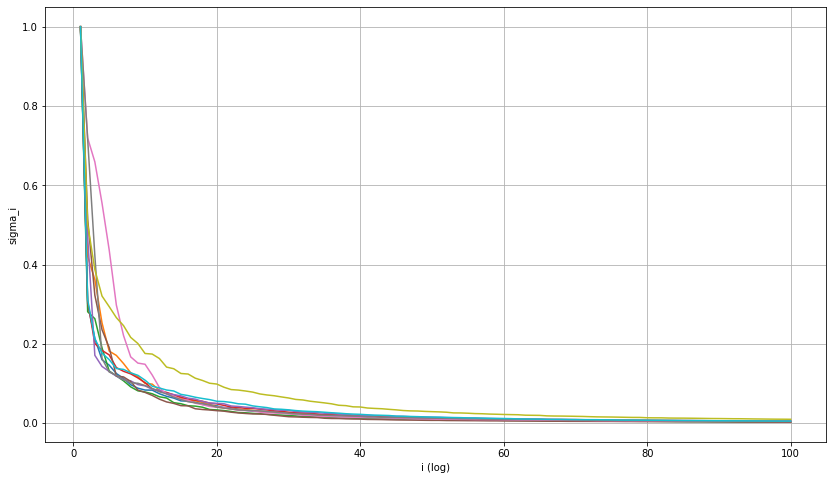

In [15]:
xs = np.arange(1, 2049)
# print(i)
plt.figure(figsize=(14,8))

plt.grid(True, which="both")
for i in range(10):
    plt.plot(xs[:100], all_singular_values[0, i, :100])
# #     print(s_i.shape)
#     plt.plot(xs, s_i)
# plt.plot(xs, np.log10(all_singular_values[0, 0, :]))
# plt.legend()
plt.xlabel("i (log)")
plt.ylabel("sigma_i")
# plt.title("Comparing SVD rank performance")
plt.savefig("test4.png")


In [7]:
from sklearn.utils.extmath import randomized_svd

def halko_svd():
    matrix = np.random.random((20, 20))
    U, Sigma, VT = randomized_svd(matrix, n_components=15, n_iter=5, random_state=None)
    print(U.shape)
    print(Sigma.shape)
    print(VT.shape)
halko_svd()

(20, 15)
(15,)
(15, 20)


[0, 1, 2, 3, 4, 5, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
[0.555556, 0.555556, 0.555556, 0.56402, 0.555556, 0.555556, 0.555556, 0.56402, 0.5, 0.534048, 0.555556, 0.555556, 0.555556, 0.555556, 0.555556, 0.555556, 0.555556, 0.555556, 0.555556, 0.555556, 0.555556, 0.555556, 0.555556, 0.552874, 0.555556, 0.555556]
(2, 25)


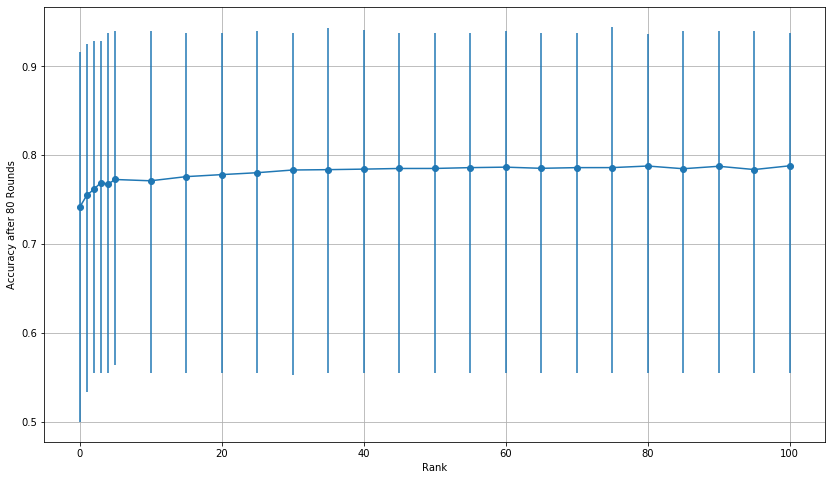

In [71]:
import glob, os
ranks = [str(i) for i in range(0,100)]
folder = "./svd_experiments/new_svd_experiments/output_new_svd"
files = []
for file in os.listdir(folder):
    if "rank" in file:
        files += [os.path.join(folder, file)]
filtered = []
for f in files:
    if any(ext+"rank" in f for ext in ranks):
        filtered += [f]

final_accuracies = []
final_ranks = []
final_ten = []
final_ninety = []
for fname in filtered:
    f = open(fname, "r")
    mean_accuracies = []
    ten = []
    ninety = []
    for x in f:
        if x.startswith("test_accuracy"):
#             print(x)
            terms = x.split()
            mean_accuracies += [float(terms[1][:-1])]
            ten += [float(terms[4][:-1])]
            ninety += [float(terms[10])]

    mean_accuracies = mean_accuracies[::2]  # the accuracies are printed twice
    ten = ten[::2]  # the accuracies are printed twice
    ninety = ninety[::2]  # the accuracies are printed twice

    if len(mean_accuracies) == 81:
        final_accuracies += [mean_accuracies[-1]]
        final_ten += [ten[-1]]
        final_ninety += [ninety[-1]]
        rank = int(fname.split("_")[7][:-4])
        final_ranks += [rank]
    f.close()

print(sorted(final_ranks))
print(final_ten)
plt.figure(figsize=(14,8))

assert(len(final_accuracies) == len(final_ranks))
plt_ranks, plt_svd_accuracies = zip(*sorted(zip(final_ranks, final_accuracies)))
_, plt_10 = zip(*sorted(zip(final_ranks, final_ten)))
_, plt_90 = zip(*sorted(zip(final_ranks, final_ninety)))

# flops = [randomized_svd_flops(3136, 2048, r) for r in final_ranks]
# final_ranks = [0] + list(final_ranks)

# final_accuracies = [0.761248] + list(final_accuracies)
# print(flops)
# total_flops = [750000000 + 12040000000 + 7710000000 + 152300000 + f for f in flops]

# logflops = flops#np.log10(flops)

# final_accuracies = final
plt_ranks = plt_ranks[:5]  + plt_ranks[6:]
plt_svd_accuracies = plt_svd_accuracies[:5]  + plt_svd_accuracies[6:]
plt_10 = plt_10[:5]  + plt_10[6:]
plt_90 = plt_90[:5] + plt_90[6:]

lower_err = [plt_svd_accuracies[i] - plt_10[i] for i in range(len(plt_svd_accuracies))]
upper_err = [plt_90[i] - plt_svd_accuracies[i] for i in range(len(plt_svd_accuracies))]
# plt.plot(plt_ranks, plt_svd_accuracies, marker='o')
plt_err = np.stack((lower_err, upper_err))
print(plt_err.shape)
plt.errorbar(plt_ranks, plt_svd_accuracies, plt_err, marker='o')
# plt.plot(logflops[1:], final_accuracies[1:])
# plt.plot(total_flops, final_accuracies)
# plt.plot(flops, final_accuracies)
plt.grid(True, which="both")
# plt.xlabel("SVD Rank")
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.title("Total FLOP count vs. Accuracy after 80 rounds")
plt.xlabel("Rank")
plt.ylabel("Accuracy after 80 Rounds")
plt.savefig('foo.png')


[0, 1, 2, 3, 4, 5, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


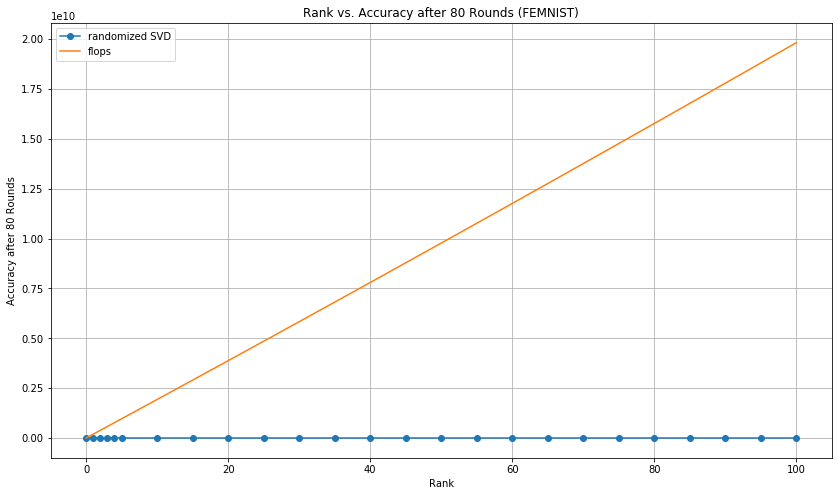

In [9]:
import glob, os
ranks = [str(i) for i in range(0,100)]
folder = "./svd_experiments/randomized_svd_experiments/output_new_svd"
files = []
for file in os.listdir(folder):
    if "rank" in file:
        files += [os.path.join(folder, file)]
filtered = []
for f in files:
    if any(ext+"rank" in f for ext in ranks):
        filtered += [f]

randomized_final_accuracies = []
final_ranks = []
final_ten_rand = []
final_ninety_rand = []
for fname in filtered:
    f = open(fname, "r")
    mean_accuracies = []
    ten = []
    ninety = []
    for x in f:
        if x.startswith("test_accuracy"):
#             print(x)
            terms = x.split()
            mean_accuracies += [float(terms[1][:-1])]
            ten += [float(terms[4][:-1])]
            ninety += [float(terms[10])]
    mean_accuracies = mean_accuracies[::2]  # the accuracies are printed twice
    ten = ten[::2]  # the accuracies are printed twice
    ninety = ninety[::2]  # the accuracies are printed twice
    if len(mean_accuracies) == 81:
        randomized_final_accuracies += [mean_accuracies[-1]]
        rank = int(fname.split("_")[7][:-4])
        final_ranks += [rank]
        final_ten_rand += [ten[-1]]
        final_ninety_rand += [ninety[-1]]
    f.close()

print(sorted(final_ranks))

plt.figure(figsize=(14,8))

assert(len(randomized_final_accuracies) == len(final_ranks))
final_ranks_plt, randomized_final_accuracies = zip(*sorted(zip(final_ranks, randomized_final_accuracies)))
_, plt_10_rand = zip(*sorted(zip(final_ranks, final_ten_rand)))
_, plt_90_rand = zip(*sorted(zip(final_ranks, final_ninety_rand)))

# flops = [randomized_svd_flops(3136, 2048, r) for r in final_ranks]
# final_ranks = [0] + list(final_ranks)



# final_accuracies = final

final_ranks_plt = final_ranks_plt[:5]  + final_ranks_plt[6:]
randomized_final_accuracies = randomized_final_accuracies[:5]  + randomized_final_accuracies[6:]
plt_10_rand = plt_10_rand[:5]  + plt_10_rand[6:]
plt_90_rand = plt_90_rand[:5] + plt_90_rand[6:]
lower_err = [randomized_final_accuracies[i] - plt_10_rand[i] for i in range(len(randomized_final_accuracies))]
upper_err = [plt_90_rand[i] - randomized_final_accuracies[i] for i in range(len(randomized_final_accuracies))]
plt_err_rand = np.stack((lower_err, upper_err))
# print(final_ranks)
assert(len(final_ranks_plt) == len(randomized_final_accuracies))
plt.plot(final_ranks_plt, randomized_final_accuracies, marker='o', label="randomized SVD")


# plt.plot(final_ranks, final_accuracies, marker='o', label='original SVD')
# plt.errorbar(final_ranks_plt, randomized_final_accuracies, plt_err_rand, marker='o', label="randomized SVD")
# 
# plt.errorbar(final_ranks_plt, plt_svd_accuracies, plt_err, marker='o', label='original SVD')

plt.legend()
plt.grid(True, which="both")
# plt.xlabel("SVD Rank")
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title("Rank vs. Accuracy after 80 Rounds (FEMNIST)")
plt.xlabel("Rank")
plt.ylabel("Accuracy after 80 Rounds")
plt.savefig('foo.png')


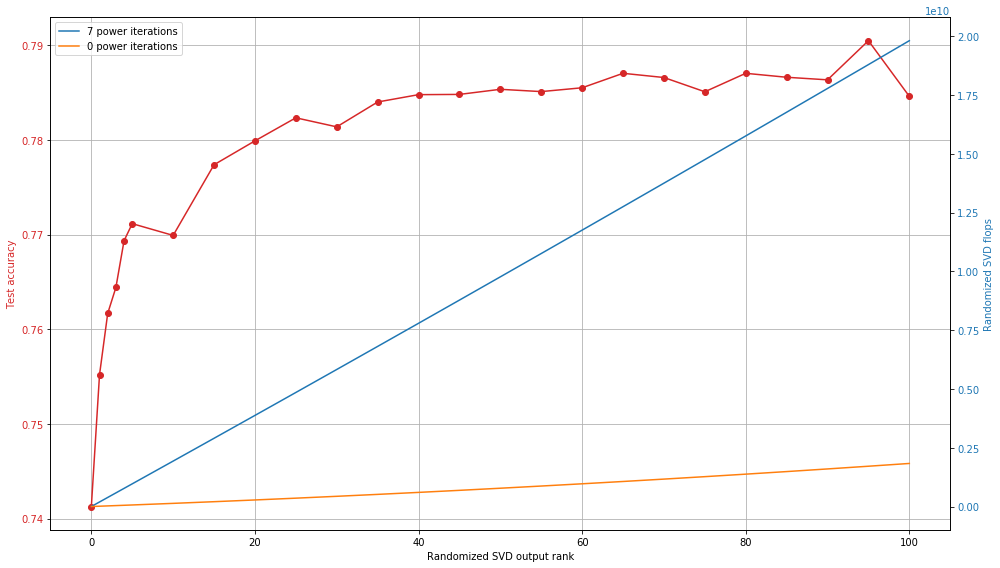

In [18]:
fig, ax1 = plt.subplots(figsize=(14,8))
plt.grid(True, which="both")
m = 3136
n = 2048
q = 7
flops = [randomized_svd_flops(m, n, r, q) for r in final_ranks_plt]
no_pwr_flops = [randomized_svd_flops(m, n, r, 0) for r in final_ranks_plt]
color = 'tab:red'
ax1.set_xlabel('Randomized SVD output rank')
ax1.set_ylabel('Test accuracy', color=color)
ax1.plot(final_ranks_plt, randomized_final_accuracies, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Randomized SVD flops', color=color)  # we already handled the x-label with ax1
ax2.plot(final_ranks_plt, flops, label="7 power iterations")
ax2.plot(final_ranks_plt, no_pwr_flops, label="0 power iterations")
ax2.legend()

ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("test.png")